# Основные концепции Machine Learning. Домашняя работа

В этом домашнем задании вам нужно запустить алгоритмы, приведенные в файлах Jupyter Notebook, используя датасет, прикрепленный в виде файла phones.csv.  
В рамках задачи регрессии нужно предсказать цену телефона, для классификации - операционную систему или год выпуска устройства. Для задачи кластеризации необходимо запустить алгоритм кластеризации, в котором количество кластеров и признаки можете выбрать на свое усмотрение.


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков
import warnings
warnings.filterwarnings('ignore')

In [3]:
### Здесь требуется загрузить датасет phones.csv ###
data = pd.read_csv("phones.csv")

In [21]:
data.head(5)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


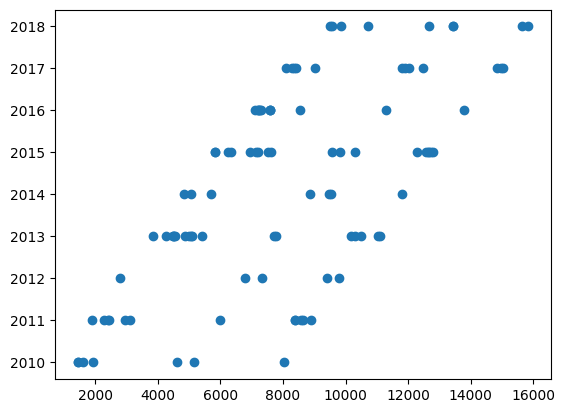

In [23]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###
plt.scatter(x=data['price'], y=data['year'])
plt.show()

Задание 1: обучить модель регрессии

In [26]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = data[['year', 'disk']]
y = data['price']

In [27]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспособность обученной модели ###
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [32]:
reg.predict(X[3:4])[0], data['price'][3]

(14952.614783923607, 15045)

Задание 2: обучить модель классификации

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = data[['year', 'disk']]
y = data['os']

In [35]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспособность обученной модели ###
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_1 <= 192.00
|   |--- class: Android
|--- feature_1 >  192.00
|   |--- class: iOS



In [36]:
cl.predict(X[2:3])[0], y[2]

('Android', 'Android')

In [38]:
cl.predict(X[3:4])[0], y[3]

('iOS', 'iOS')

Задание 3: обучить модель кластеризации

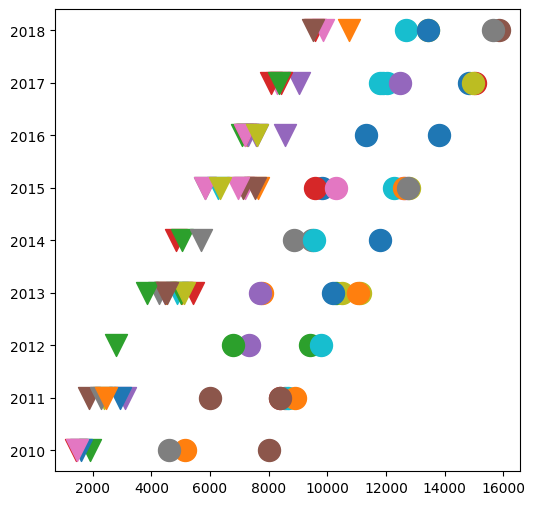

In [42]:
fig = plt.figure(figsize=(6, 6)) # создаем картинку 

markers = {"iOS": "o", "Android": "v"}
for d1, d2, l in zip(data.price, data.year, data.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [47]:
from sklearn.cluster import KMeans
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = data[['year', 'price']]

In [49]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспособность обученной модели ###
clust = KMeans(n_clusters=3).fit(X)
[c1, c2, c3] = clust.cluster_centers_
clust.cluster_centers_

array([[ 2012.13333333,  3958.53333333],
       [ 2016.20833333, 12896.83333333],
       [ 2014.54347826,  8323.32608696]])

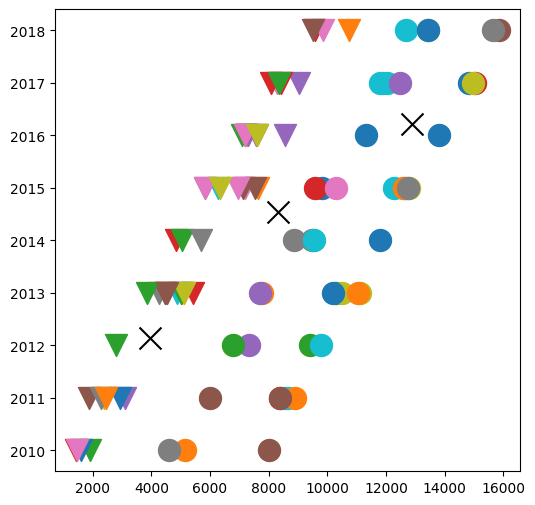

In [56]:
fig = plt.figure(figsize=(6, 6)) # создаем картинку 

markers = {"iOS": "o", "Android": "v"}
for d1, d2, l in zip(data.price, data.year, data.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

plt.scatter(c1[1], c1[0], s=250, marker="x", c="black")
plt.scatter(c2[1], c2[0], s=250, marker="x", c="black")
plt.scatter(c3[1], c3[0], s=250, marker="x", c="black")

# отображаем картинку
plt.show()